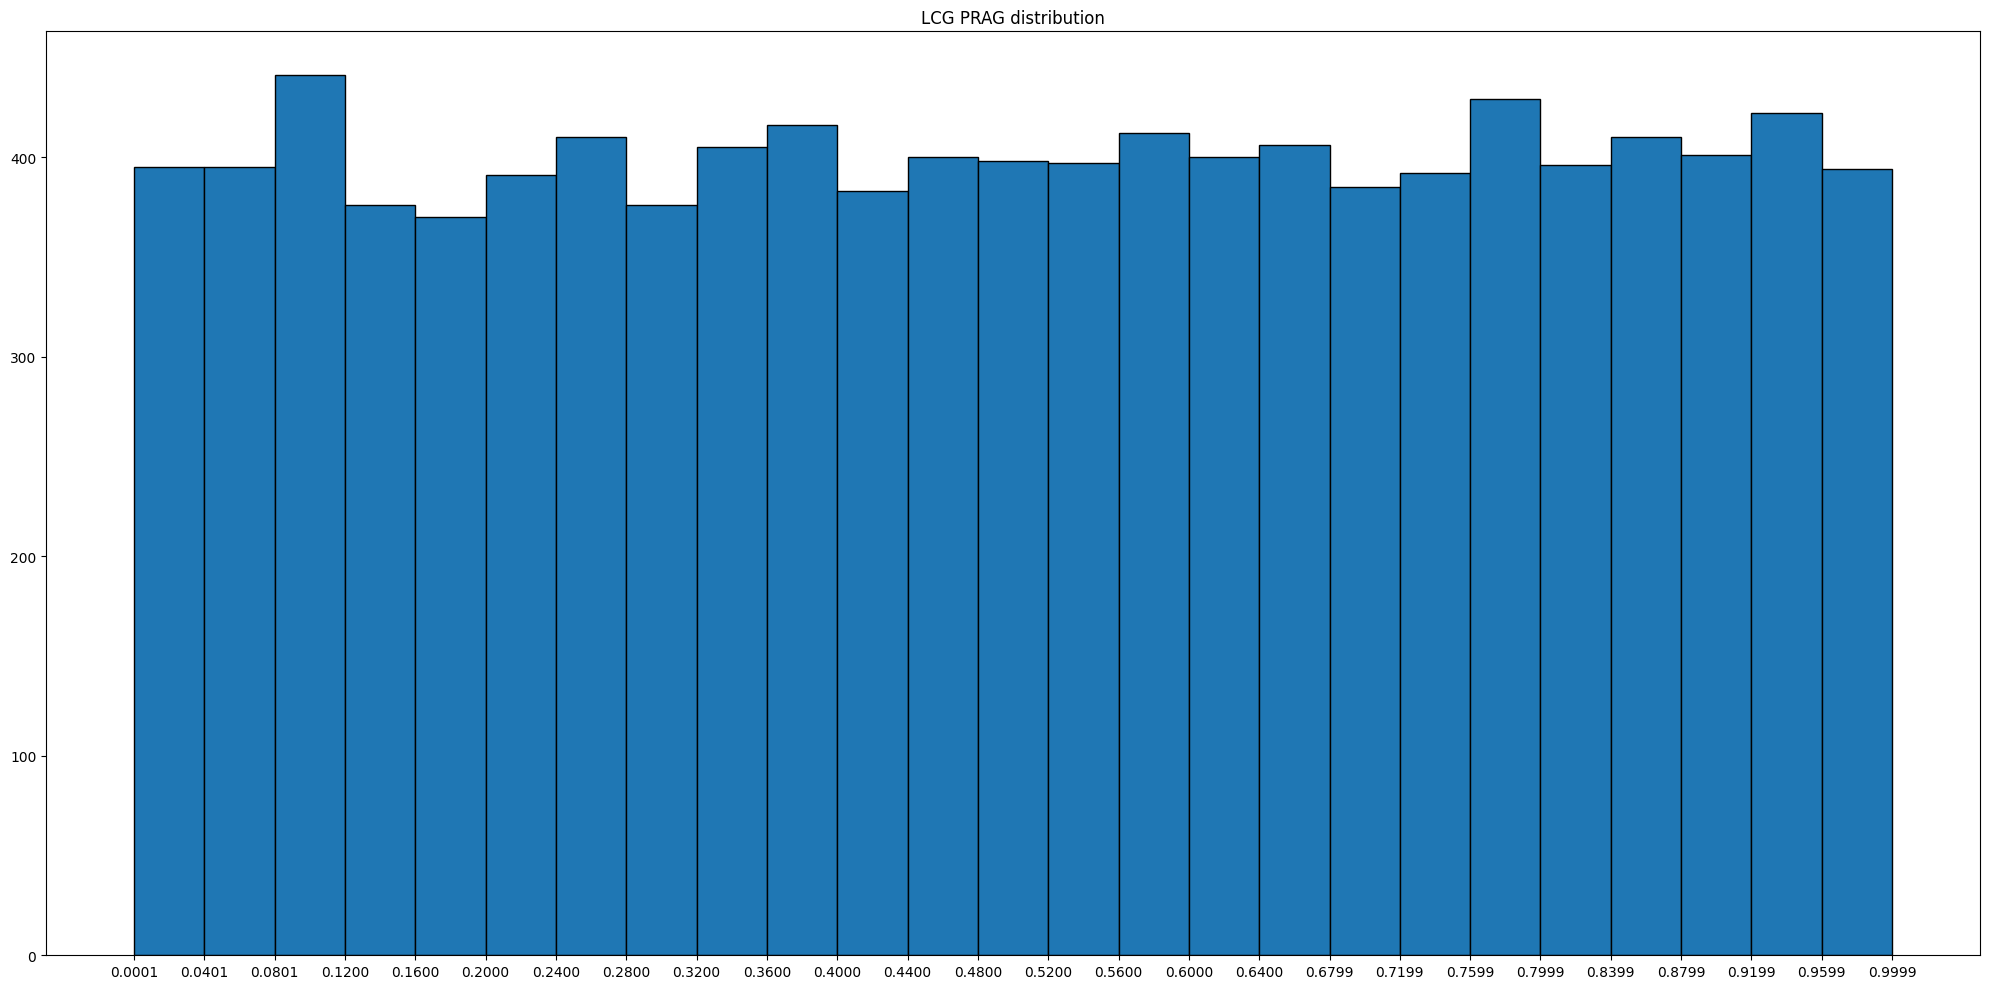

In [12]:
# RNG Algorithm
import numpy as np
import matplotlib.pyplot as plt


def lcg() -> int:
    """
    Generate a random number using the linear congruential generator.
    output:
        random int between 0 and 2^48 - 1
    """
    global seed
    seed = (25214903917 * seed + 11) & ((1 << 48) - 1)  # use bit calculation instead of modulo operation
    return seed


seed = 2  # init: we can chage the initial seed to control the PRNG

if __name__ == '__main__':
    xdata = [lcg() / ((1 << 48)) for i in range(10000)]  # generate 10000 random numbers

    plt.figure(figsize=(20, 10))
    plt.title("LCG PRAG distribution")
    nums, bins, patches = plt.hist(xdata, bins=25, edgecolor='k')
    plt.xticks(bins)
    plt.tight_layout()
    plt.show()


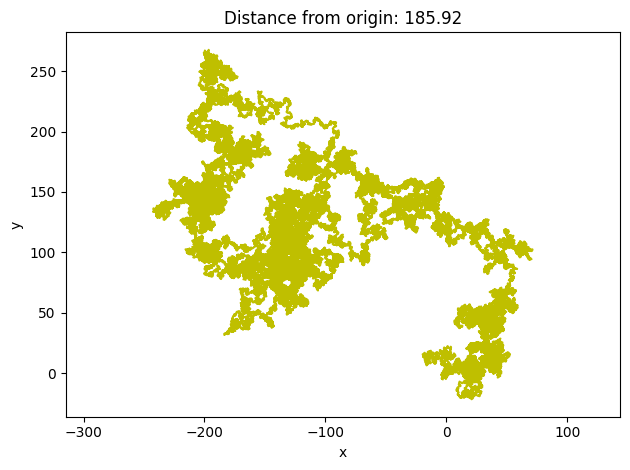

In [13]:
# 2D random walk
jmax = 100000

xlist = np.cumsum(2*np.random.random(jmax) - 1)
ylist = np.cumsum(2*np.random.random(jmax) - 1)
R = np.sqrt(xlist[-1] ** 2 + ylist[-1] ** 2)


fig = plt.figure()
plt.title("Distance from origin: %.2f" % R)
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')

plt.plot(xlist, ylist, 'y.-', markersize=0.1/np.sqrt(jmax))

plt.tight_layout()
plt.show()


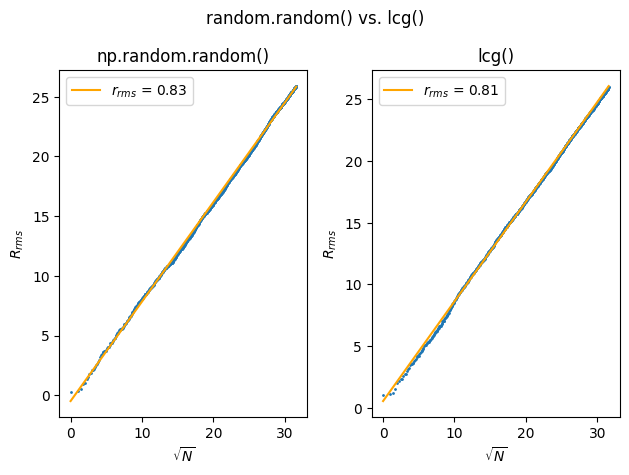

In [25]:
from scipy import optimize


def linear_function(x, A, B):
    return A * x + B


N = 1000
i = np.arange(N)
sqrtN = np.sqrt(i)

# plot
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('random.random() vs. lcg()')

# fig1: np.random.random()
ax1.set_title("np.random.random()")
ax1.set_xlabel("$\sqrt{N}$")
ax1.set_ylabel("$R_{rms}$")

dx = 2.0*np.random.random(N) - 1
dy = 2.0*np.random.random(N) - 1
Rrms2 = np.cumsum(dx*dx + dy*dy)
Rrms = np.sqrt(Rrms2)

ax1.scatter(sqrtN, Rrms, s=1)

A1, B1 = optimize.curve_fit(linear_function, sqrtN, Rrms)[0]
opt_y1 = [linear_function(x, A1, B1) for x in sqrtN]
ax1.plot(sqrtN, opt_y1, "orange", label="$r_{rms}$ = %.2f" % A1)
ax1.legend(loc="best")


# fig2: lcg()
ax2.set_title("lcg()")
ax2.set_xlabel("$\sqrt{N}$")
ax2.set_ylabel("$R_{rms}$")

dx = 2.0*np.array([lcg() / ((1 << 48)) for _ in range(N)]) - 1
dy = 2.0*np.array([lcg() / ((1 << 48)) for _ in range(N)]) - 1
Rrms2 = np.cumsum(dx*dx + dy*dy)
Rrms = np.sqrt(Rrms2)

ax2.scatter(sqrtN, Rrms, s=1)

A2, B2 = optimize.curve_fit(linear_function, sqrtN, Rrms)[0]
opt_y2 = [linear_function(x, A2, B2) for x in sqrtN]
ax2.plot(sqrtN, opt_y2, "orange", label="$r_{rms}$ = %.2f" % A2)
ax2.legend(loc="best")

plt.tight_layout()
plt.show()


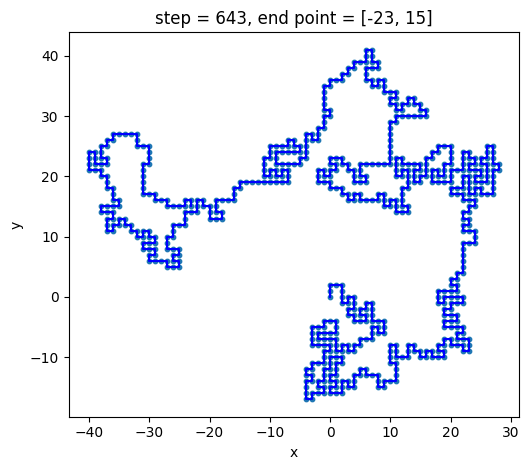

In [34]:
# self-avoiding walk
step = 0
expected_value = 600

while step < expected_value:
    # init
    X = [0]
    Y = [0]

    exist_set = set([(0, 0)])
    possible_set = set([
        (1, 0),
        (0, 1),
        (-1, 0),
        (0, -1)
    ])

    # grow
    while possible_set != set():
        possible_list = list(possible_set)
        choice = possible_list[np.random.randint(len(possible_list))]
        exist_set.add(choice)

        nextx = choice[0]
        nexty = choice[1]
        X.append(nextx)
        Y.append(nexty)

        possible_set.clear()
        possible_set.add((nextx+1, nexty))
        possible_set.add((nextx, nexty+1))
        possible_set.add((nextx-1, nexty))
        possible_set.add((nextx, nexty-1))
        possible_set = possible_set - exist_set

    # length
    step = len(X)


# plot
fig, ax = plt.subplots()
plt.title('step = %d' % step + ', end point = [%d, %d]' % (X[-1], Y[-1]))
plt.xlabel("x")
plt.ylabel("y")
ax.set_aspect('equal')

plt.plot(X, Y, "b-")
plt.scatter(X, Y, s=10)

plt.tight_layout()
plt.show()


In [ ]:
from matplotlib.animation import FuncAnimation


fig, ax = plt.subplots()
line, = plt.plot([], [], "b-", animated=True)
x = []
y = []


def init():
    plt.title("2D random walk")
    plt.xlabel("x")
    plt.ylabel("y")
    ax.set_aspect('equal')
    ax.set_xlim(min(X)-2, max(X)+2)
    ax.set_ylim(min(Y)-2, max(Y)+2)
    return line,


def update(frame):
    x.append(X[frame])
    y.append(Y[frame])
    line.set_data(x, y)
    return line,


ani = FuncAnimation(fig, update, frames=len(X), interval=10, init_func=init, blit=True)
ani.save("animation.gif", fps=12, writer="pillow")
